<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assignment4_FCFNN_Classifier_MNIST_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a report in pdf format using any Latex system after:
* building an FCFNN based classifier according to your preferences about the
number of hidden layers and neurons in the hidden layers.
* training and testing your FCFNN based classifier using the:
  * Fashion MNIST dataset.
  * MNIST English dataset.
  * CIFAR-10 dataset.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist, mnist, cifar10
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def preprocess_data(dataset):
  (trainX, trainY), (testX, testY) = dataset.load_data()

  print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
  print(f"testX shape: {testX.shape}, testY shape: {testY.shape}")

  # Normalize inputs to [0,1] and ensure float32
  trainX = trainX.astype('float32')/255.0
  testX = testX.astype('float32')/255.0

  # Convert output labels to one-hot encoding (for 10 classes: digits 0-9)
  trainY = to_categorical(trainY, 10)
  testY = to_categorical(testY, 10)

  print("After normalization and labeling:\n")
  print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
  print(f"testX shape: {testX.shape}, testY shape: {testY.shape}")

  return (trainX, trainY), (testX, testY)

In [ ]:
def build_model(input_shape):
  inputs = Input(input_shape)
  x = Flatten()(inputs)
  h1 = Dense(128, activation = 'relu')(x)
  h2 = Dense(64, activation = 'relu')(h1)
  h3 = Dense(128, activation = 'relu')(h2)
  outputs = Dense(10, activation = 'softmax')(h3)

  model = Model(inputs, outputs)
  model.summary(show_trainable=True)
  model.compile(optimizer='adam', loss='categorical_crossentropy')

  return model


In [ ]:
def train_model(my_model, trainX, trainY, training_epochs):
  history = my_model.fit(
      trainX, trainY,
      validation_split = 0.2,
      batch_size = 512,
      epochs = training_epochs,
  )
  return history

In [ ]:
def loss_curve(training_history):
  plt.figure(figsize=(8, 6))
  plt.plot(training_history.history['loss'], label='train_loss')
  plt.plot(training_history.history['val_loss'], label='val_loss')
  plt.title('Loss Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def sample_prediction_plot(testX, testY_labels, predY_labels, class_names):
  plt.figure(figsize=(10, 10))
  num_samples, rows, cols = 25, 5, 5
  for i in range(min(num_samples, len(testX))):
      plt.subplot(rows, cols, i+1)
      plt.axis('off')
      plt.imshow(testX[i])
      color = 'green' if(testY_labels[i] == predY_labels[i]) else 'red'
      plt.title(f'True: {class_names[testY_labels[i]]},\n Pred: {class_names[predY_labels[i]]}', color=color)
  plt.suptitle(f'Sample Predictions from Test Set')
  plt.tight_layout()
  plt.show()

In [ ]:
def classifier_pipeline(dataset, class_names, training_epochs):
  (trainX, trainY), (testX, testY) = preprocess_data(dataset)
  input_shape = trainX.shape[1:]
  model = build_model(input_shape)
  history = train_model(model, trainX, trainY, training_epochs)
  predY = model.predict(testX)
  predY_labels = np.argmax(predY, axis=1)
  testY_labels = np.argmax(testY, axis=1)

  acc = accuracy_score(testY_labels, predY_labels)
  print(f"Accuracy: {acc:.4f}")
  loss_curve(history)
  sample_prediction_plot(testX, testY_labels, predY_labels, class_names)

In [ ]:
def main():
  # Fashion Mnist dataset
  fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
  ]
  classifier_pipeline(fashion_mnist, fashion_mnist_classes, 12)

  # Mnist dataset
  mnist_classes = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"
  ]
  classifier_pipeline(mnist, mnist_classes, 10)

  # Cifar10 dataset
  cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
  ]
  classifier_pipeline(cifar10, cifar10_classes, 25)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
trainX shape: (60000, 28, 28), trainY shape: (60000,)
testX shape: (10000, 28, 28), testY shape: (10000,)
After normalization and labeling:

trainX shape: (60000, 28, 28), trainY shape: (60000, 10)
testX shape: (10000, 28, 28), testY shape: (10000, 10)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 28, 28)        │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 784)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 128)           │    100,480 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_3 (Dense)             │ (None, 10)            │      1,290 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 118,346 (462.29 KB)

 Trainable params: 118,346 (462.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.2620 - val_loss: 0.4865
Epoch 2/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4546 - val_loss: 0.4324
Epoch 3/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4034 - val_loss: 0.3839
Epoch 4/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3683 - val_loss: 0.3698
Epoch 5/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3448 - val_loss: 0.3701
Epoch 6/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3288 - val_loss: 0.3502
Epoch 7/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3111 - val_loss: 0.3474
Epoch 8/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2974 - val_loss: 0.3593
Epoch 9/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2856 - val_loss: 0.3286
Epoch 10/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2705 - val_loss: 0.3216
Epoch 11/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2615 - val_loss: 0.3284
Epoch 12/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2586 - val_l

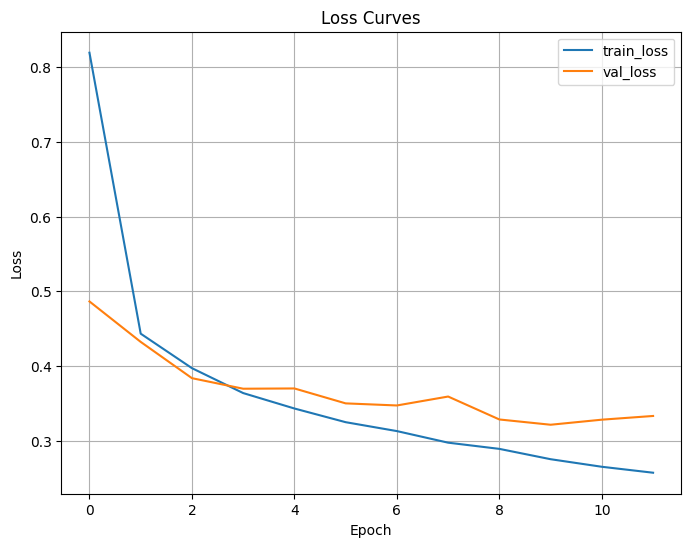

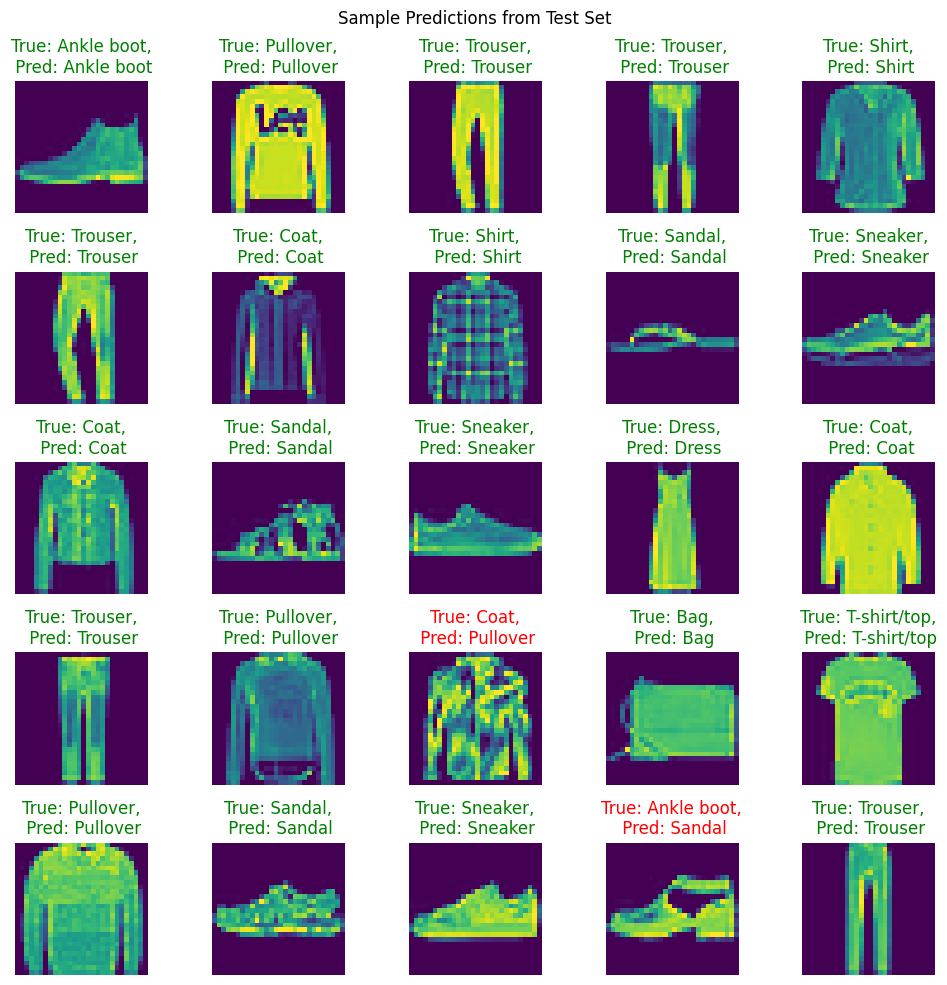

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
trainX shape: (60000, 28, 28), trainY shape: (60000,)
testX shape: (10000, 28, 28), testY shape: (10000,)
After normalization and labeling:

trainX shape: (60000, 28, 28), trainY shape: (60000, 10)
testX shape: (10000, 28, 28), testY shape: (10000, 10)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 28, 28)        │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_1 (Flatten)         │ (None, 784)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_4 (Dense)             │ (None, 128)           │    100,480 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_5 (Dense)             │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_6 (Dense)             │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_7 (Dense)             │ (None, 10)            │      1,290 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 118,346 (462.29 KB)

 Trainable params: 118,346 (462.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.1524 - val_loss: 0.2470
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2396 - val_loss: 0.1755
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1673 - val_loss: 0.1481
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1239 - val_loss: 0.1254
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0983 - val_loss: 0.1191
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0799 - val_loss: 0.1073
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0704 - val_loss: 0.1029
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0507 - val_loss: 0.1009
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0483 - val_loss: 0.0970
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0374 - val_loss: 0.1002
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9749


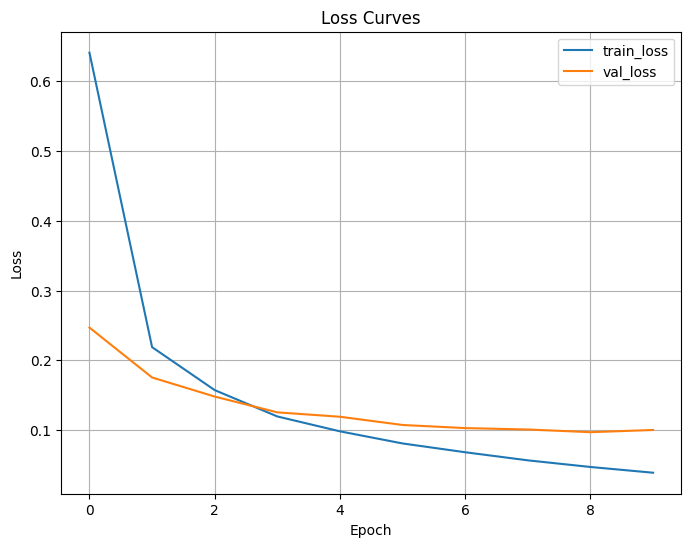

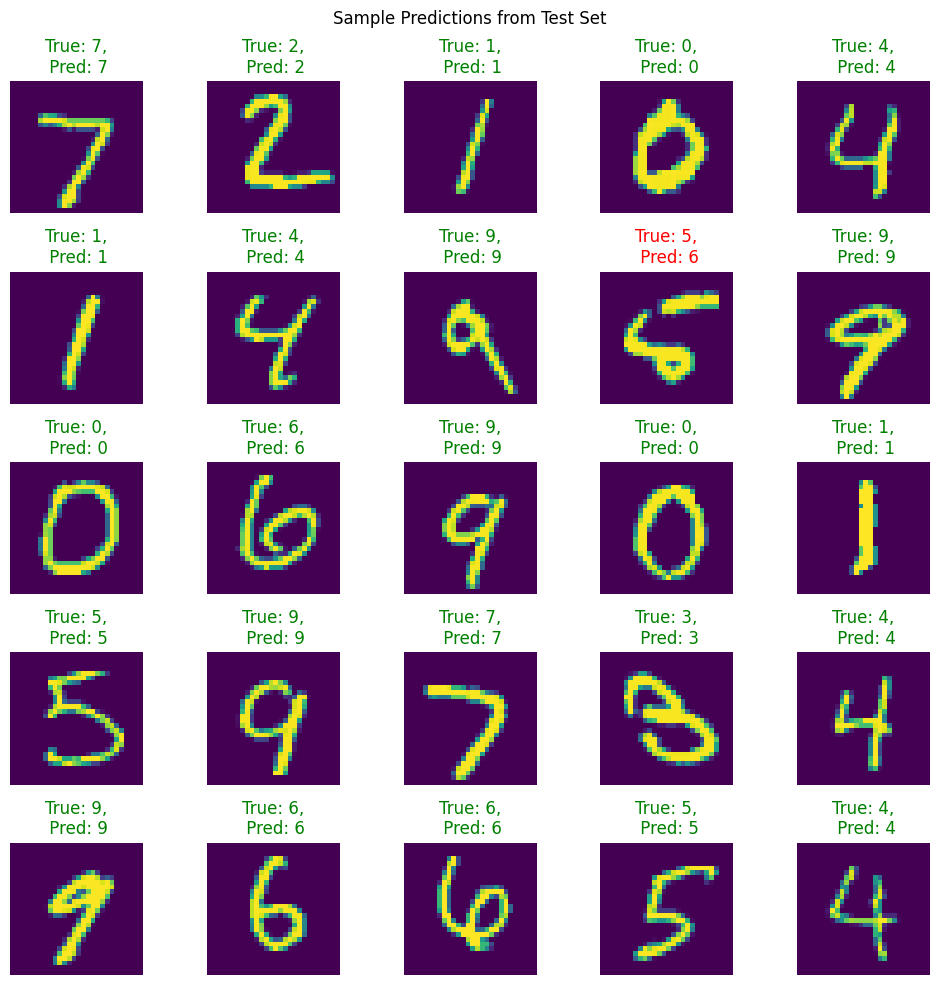

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
trainX shape: (50000, 32, 32, 3), trainY shape: (50000, 1)
testX shape: (10000, 32, 32, 3), testY shape: (10000, 1)
After normalization and labeling:

trainX shape: (50000, 32, 32, 3), trainY shape: (50000, 10)
testX shape: (10000, 32, 32, 3), testY shape: (10000, 10)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_2 (Flatten)         │ (None, 3072)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_8 (Dense)             │ (None, 128)           │    393,344 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_9 (Dense)             │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_10 (Dense)            │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_11 (Dense)            │ (None, 10)            │      1,290 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 411,210 (1.57 MB)

 Trainable params: 411,210 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.1363 - val_loss: 1.8777
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8345 - val_loss: 1.8342
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7581 - val_loss: 1.7223
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6765 - val_loss: 1.7203
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6397 - val_loss: 1.7539
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6358 - val_loss: 1.6415
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5675 - val_loss: 1.6364
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5494 - val_loss: 1.5937
Epoch 9/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5303 - val_loss: 1.5800
Epoch 10/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5038 - val_loss: 1.5605
Epoch 11/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4817 - val_loss: 1.5494
Epoch 12/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4732 - val_l

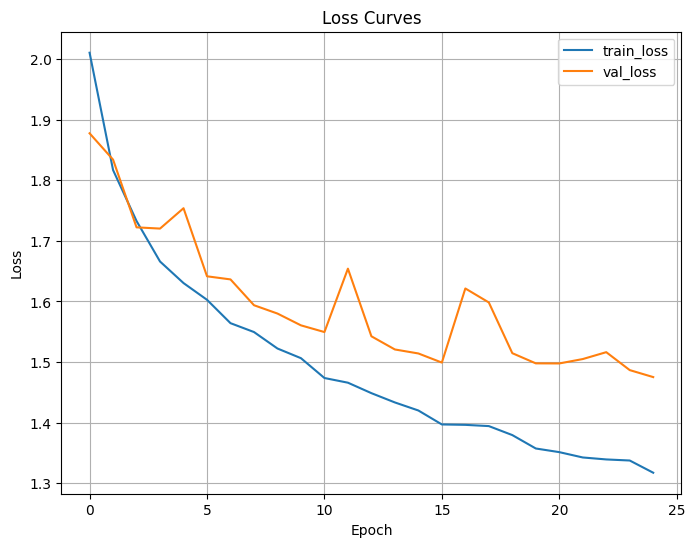

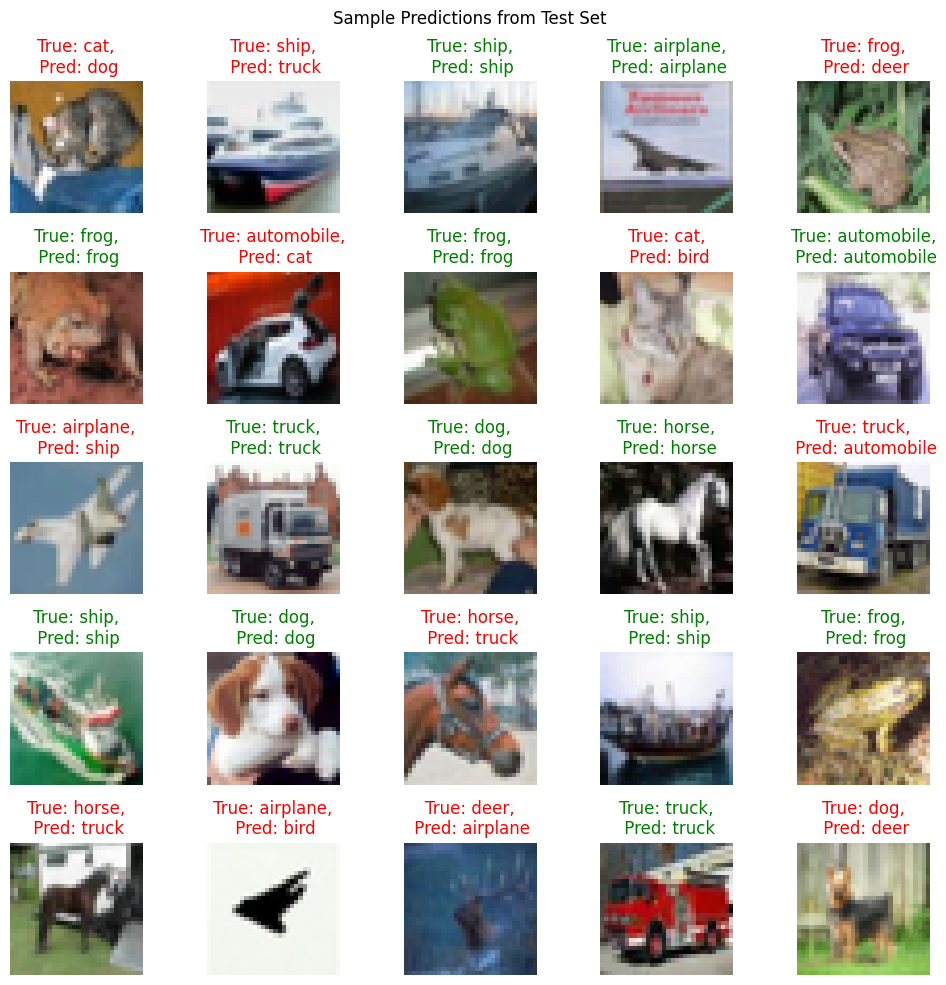

In [ ]:
if __name__ == '__main__':
    main()